In [21]:
import os
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans, vq
from sklearn.preprocessing import StandardScaler
from datetime import datetime, timezone

In [22]:
def convert_to_unit(time, units):
    if units == "seconds since 2008-03-01 00:00:00":
        return (time.replace(tzinfo=timezone.utc) - datetime(2008, 3, 1).replace(tzinfo=timezone.utc)).total_seconds()
    elif units == "seconds since 1970-01-01 00:00:00":
        return time.timestamp()
    else:
        raise HTTPException(status_code=400,
                            detail="Apologies unable to read NetCDF with time unit: {}".format(units))

In [23]:
def get_closest_index(value, array):
    array = np.asarray(array)
    sorted_array = np.sort(array)
    if len(array) == 0:
        raise ValueError("Array must be longer than len(0) to find index of value")
    elif len(array) == 1:
        return 0
    if value > (2 * sorted_array[-1] - sorted_array[-2]):
        raise HTTPException(status_code=400,
                            detail="Value {} greater than max available ({})".format(value, sorted_array[-1]))
    elif value < (2 * sorted_array[0] - sorted_array[-1]):
        raise HTTPException(status_code=400,
                            detail="Value {} less than min available ({})".format(value, sorted_array[0]))
    return (np.abs(array - value)).argmin()

In [24]:
def centroid_difference(data):
    k = 4
    centroids, _ = kmeans(data, k)
    cluster_labels, _ = vq(data, centroids)
    for i in range(k):
        cluster_points = data[cluster_labels == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}')

    # Plot centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=100, label='Centroids')
    plt.legend()
    return np.linalg.norm(centroids[0] - centroids[1])

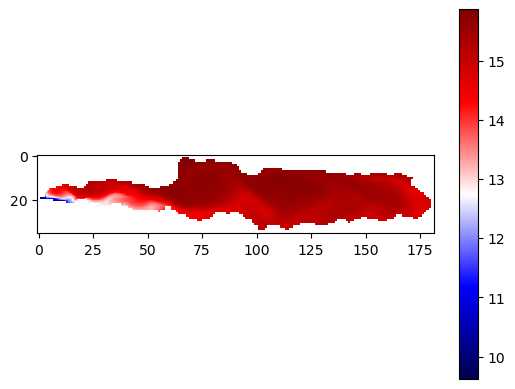

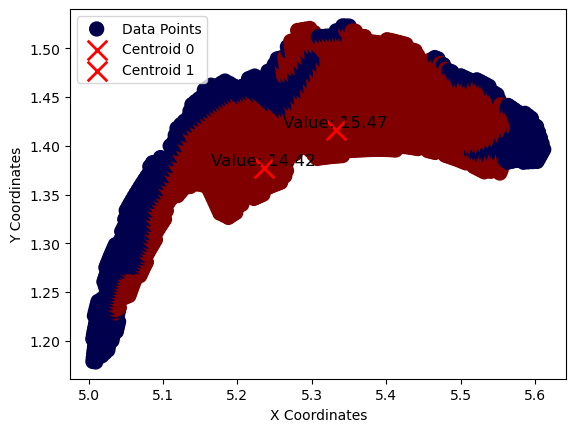

In [26]:
folder = "/home/runnalja/git/alplakes/simulations/runs/eawag_delft3dflow60210142612_delft3dflow_geneva_20231015_20231105"
depth = 1

with netCDF4.Dataset(os.path.join(folder, "trim-Simulation_Web.nc")) as nc:
    depth_index = get_closest_index(depth, np.array(nc.variables["ZK_LYR"][:]) * -1)
    x = np.array(nc.variables["XZ"][:]).flatten()/100000
    y = np.array(nc.variables["YZ"][:]).flatten()/100000
    time_index = get_closest_index(494114400, np.array(nc.variables["time"][:]))
    values = np.array(nc.variables["R1"][time_index, 0, depth_index, :]).flatten()
    
    plot_values = np.array(nc.variables["R1"][time_index, 0, depth_index, :])
    plot_values[plot_values == -999] = np.nan
    
    plt.imshow(plot_values.T, cmap='seismic')
    plt.colorbar()
    plt.show()
    
    mask = values != -999
    data = np.column_stack((x[mask], y[mask], values[mask]))
    k = 2
    centroids, _ = kmeans(data, k)
    cluster_labels, _ = vq(data, centroids)
    plt.scatter(x[mask], y[mask], c=cluster_labels, cmap='seismic', s=100, alpha=1, label='Data Points')

    # Plot centroids
    for i, centroid in enumerate(centroids):
        plt.scatter(centroid[0], centroid[1], marker='x', c='red', s=200, linewidths=2, label=f'Centroid {i}')
        plt.text(centroid[0], centroid[1], f'Value: {centroid[2]:.2f}', fontsize=12, ha='center', va='bottom')

    plt.xlabel('X Coordinates')
    plt.ylabel('Y Coordinates')
    plt.legend()
    plt.show()

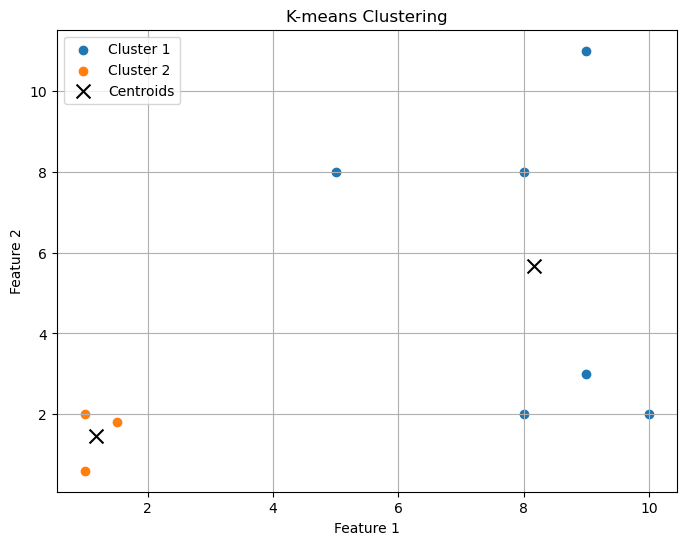

In [50]:
# Sample data: 2D matrix where each row is a data point
data = np.array([[1.0, 2.0],
                 [1.5, 1.8],
                 [5.0, 8.0],
                 [8.0, 8.0],
                 [1.0, 0.6],
                 [9.0, 11.0],
                 [8.0, 2.0],
                 [10.0, 2.0],
                 [9.0, 3.0]])

# Number of clusters
k = 2

# Perform K-means clustering
centroids, _ = kmeans(data, k)

# Assign each data point to a cluster
cluster_labels, _ = vq(data, centroids)

# Create a plot where each cluster is represented by a block color
plt.figure(figsize=(8, 6))

# Plot each cluster
for i in range(k):
    cluster_points = data[cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=100, label='Centroids')

plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [68]:
nc.variables["time"][:]

RuntimeError: NetCDF: Not a valid ID

In [1]:
start_time = functions.convert_to_unit(start_datetime, nc.variables["time"].units)

NameError: name 'functions' is not defined

In [3]:
from datetime import datetime

# Define the two dates
date1 = datetime(2023, 10, 27, 22, 0, 0)
date2 = datetime(2008, 3, 1, 0, 0, 0)

# Calculate the difference in seconds
difference_in_seconds = (date1 - date2).total_seconds()
difference_in_seconds

494114400.0

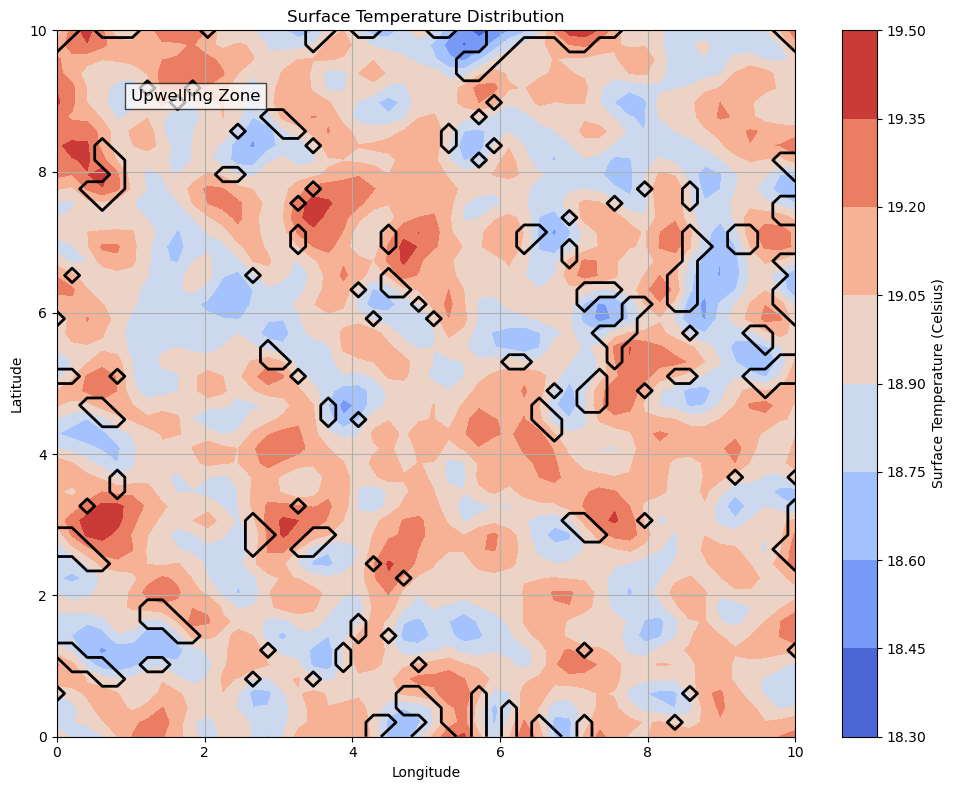

Upwelling zones detected.


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Example data: surface temperature distribution (replace with your actual simulation data)
# Assuming a 2D grid for simplicity
# Replace with your actual data or generate a sample dataset
lon = np.linspace(0, 10, 50)  # Longitude
lat = np.linspace(0, 10, 50)  # Latitude
lon_grid, lat_grid = np.meshgrid(lon, lat)

# Generate example surface temperature data
temperature = np.random.uniform(18.0, 20.0, size=(50, 50))

# Smooth the temperature field to reduce noise
temperature_smoothed = gaussian_filter(temperature, sigma=1)

# Calculate horizontal gradients using central differences
grad_x, grad_y = np.gradient(temperature_smoothed, lon, lat)

# Define a threshold for gradient magnitude to detect upwelling
gradient_threshold = 1  # Example threshold (adjust as per your data characteristics)

# Detect upwelling zones based on gradient magnitude
upwelling_mask = np.sqrt(grad_x**2 + grad_y**2) > gradient_threshold

# Plotting for visualization
plt.figure(figsize=(10, 8))

# Plot surface temperature
plt.contourf(lon_grid, lat_grid, temperature_smoothed, cmap='coolwarm')
plt.colorbar(label='Surface Temperature (Celsius)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Surface Temperature Distribution')

# Overlay upwelling zones
plt.contour(lon_grid, lat_grid, upwelling_mask, levels=[0.5], colors='k', linewidths=2)
plt.text(1, 9, 'Upwelling Zone', color='k', fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

plt.grid(True)
plt.tight_layout()
plt.show()

# Output upwelling information
if np.any(upwelling_mask):
    print("Upwelling zones detected.")
else:
    print("No upwelling zones detected in this temperature distribution.")

/home/runnalja/anaconda3/envs/airflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


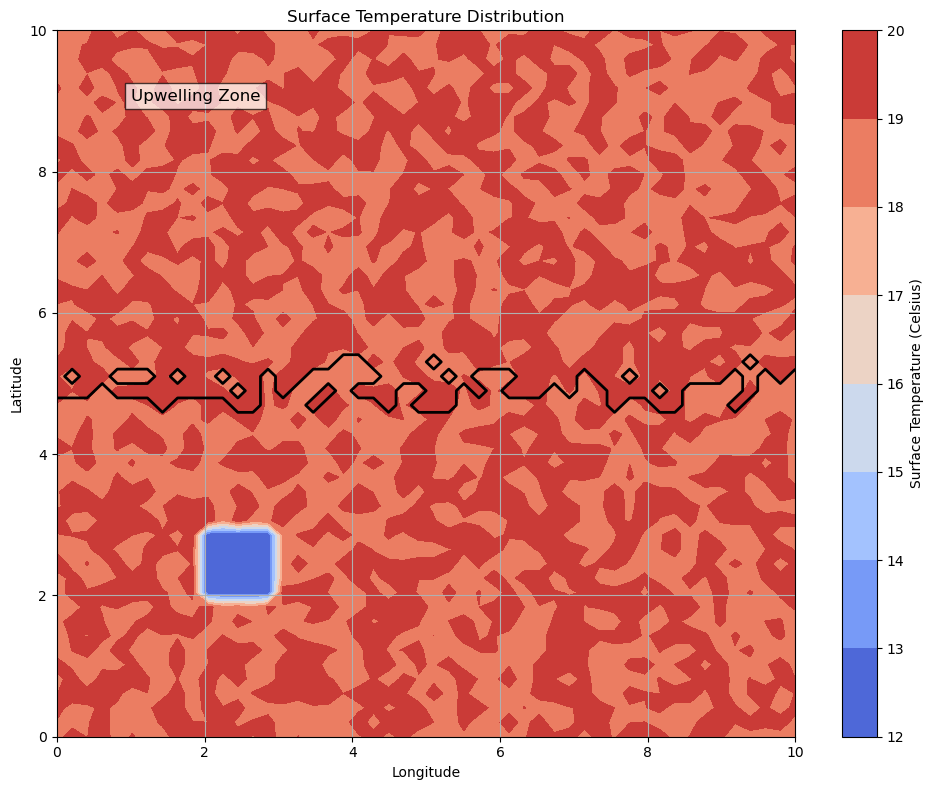

Upwelling zones detected.


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Example data: surface temperature distribution (replace with your actual simulation data)
# Assuming a 2D grid for simplicity
# Replace with your actual data or generate a sample dataset
lon = np.linspace(0, 10, 50)  # Longitude
lat = np.linspace(0, 10, 50)  # Latitude
lon_grid, lat_grid = np.meshgrid(lon, lat)

# Generate example surface temperature data
temperature = np.random.uniform(18.0, 20.0, size=(50, 50))
temperature[10:15, 10:15] = 12

# Reshape data for clustering
X = np.column_stack((lon_grid.ravel(), lat_grid.ravel(), temperature.ravel()))

# Normalize data (optional but often recommended for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# Reshape cluster results back to 2D grid
clustered_grid = clusters.reshape(lon_grid.shape)

# Plotting for visualization
plt.figure(figsize=(10, 8))

# Plot surface temperature
plt.contourf(lon_grid, lat_grid, temperature, cmap='coolwarm')
plt.colorbar(label='Surface Temperature (Celsius)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Surface Temperature Distribution')

# Overlay clustering results (upwelling zones)
plt.contour(lon_grid, lat_grid, clustered_grid, levels=[0.5], colors='k', linewidths=2)
plt.text(1, 9, 'Upwelling Zone', color='k', fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

plt.grid(True)
plt.tight_layout()
plt.show()

# Output upwelling information
if np.any(clustered_grid == 0):
    print("Upwelling zones detected.")
else:
    print("No upwelling zones detected in this temperature distribution.")

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Example 1D dataset (replace with your actual data)
np.random.seed(0)
data = np.random.normal(loc=[2, 8], scale=[1, 1], size=100).reshape(-1, 1)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(data)

# Plotting for visualization
plt.figure(figsize=(8, 6))

# Plot the data points
plt.scatter(data, np.zeros_like(data), c=clusters, cmap='viridis', marker='o', s=50, alpha=0.6)

# Plot the cluster centers
plt.scatter(kmeans.cluster_centers_, np.zeros_like(kmeans.cluster_centers_), marker='x', color='red', s=100, label='Cluster Centers')

plt.xlabel('Data')
plt.title('KMeans Clustering on 1D Data')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Output cluster information
cluster_counts = np.bincount(clusters)
print(f"Cluster 0 has {cluster_counts[0]} points")
print(f"Cluster 1 has {cluster_counts[1]} points")

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (100,) and arg 1 with shape (2,).